In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
# Loading the Dataset
df = pd.read_csv(r"C:\Users\ahmed\Downloads\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#Since the 'Type' Feature can be ignored, we won't be considering it in our Model Building
data = df.iloc[:,1:]
data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Lets perform few EDA
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

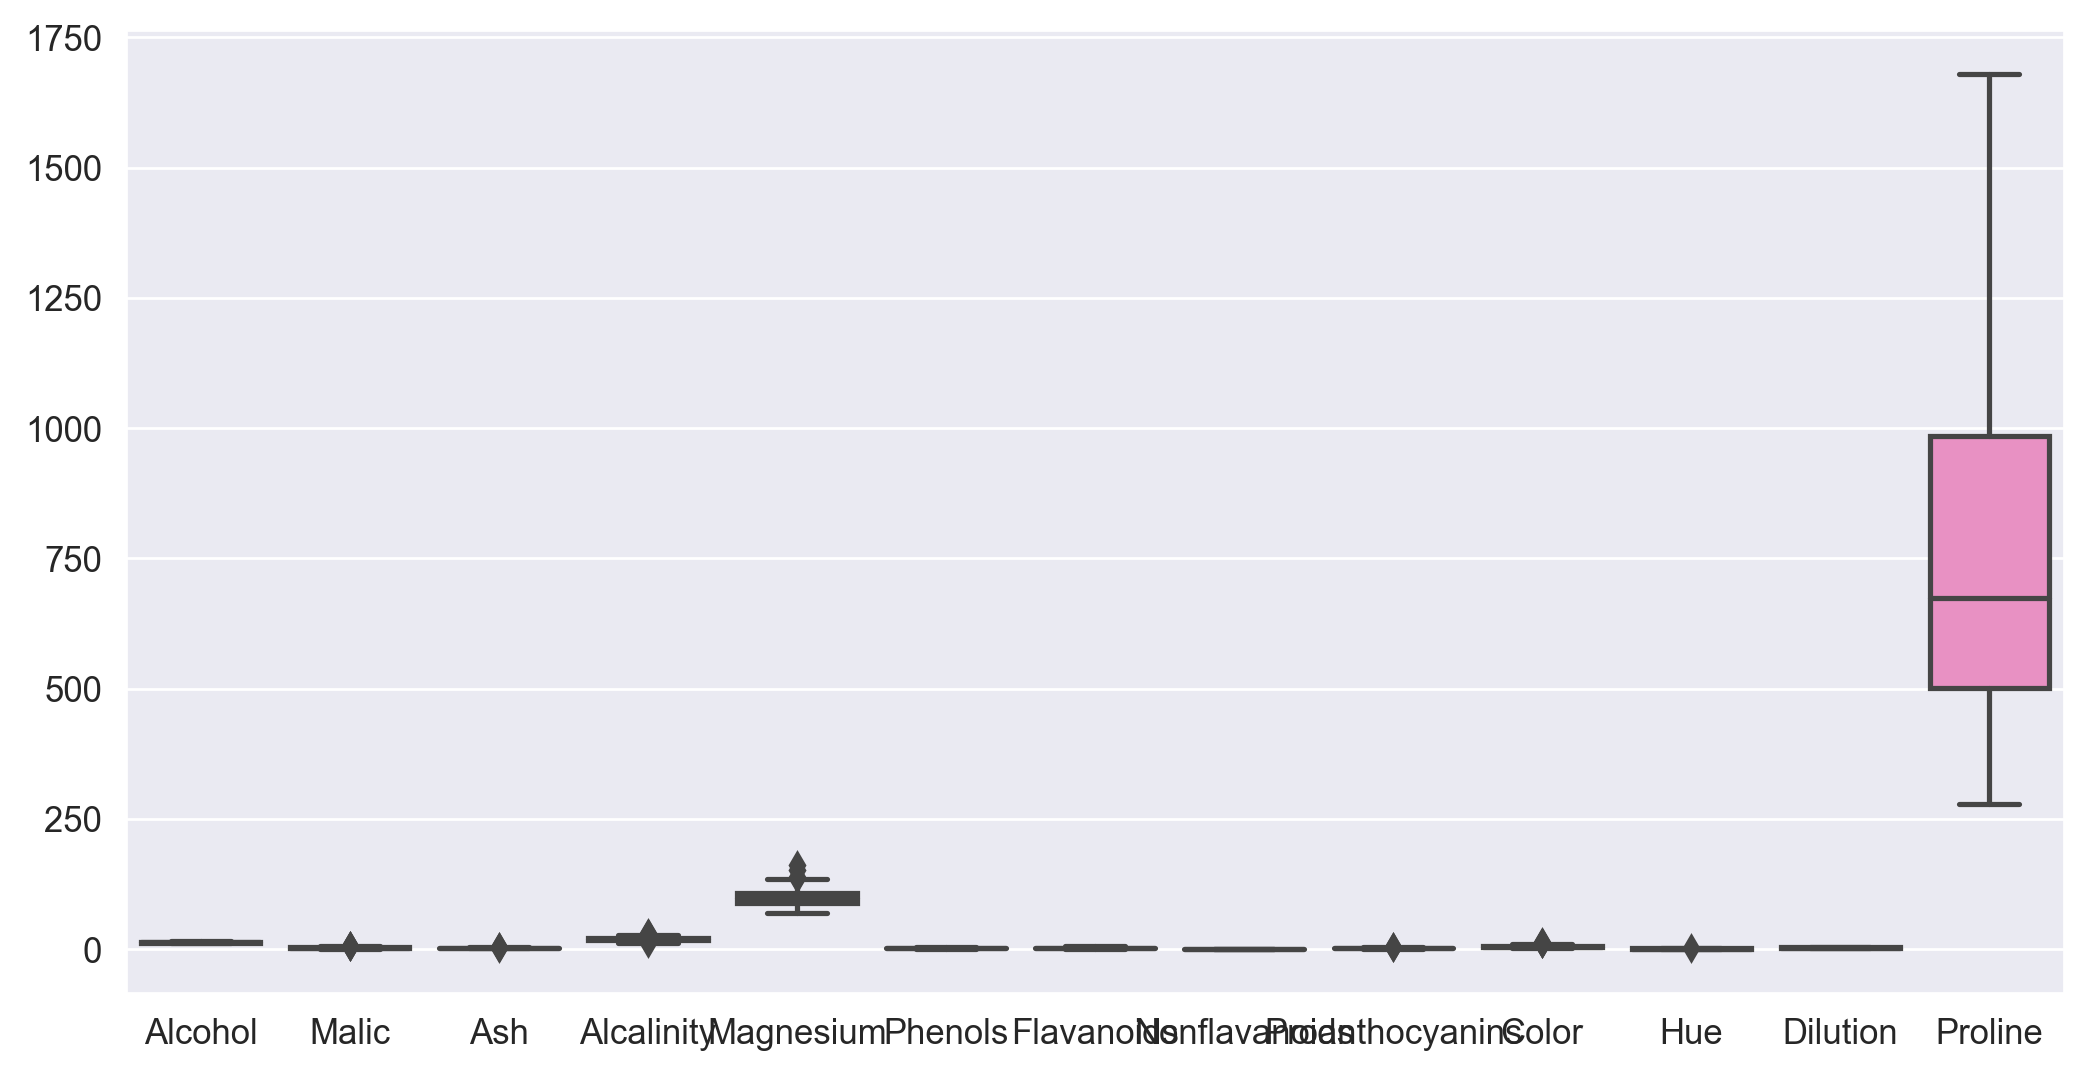

In [5]:
sns.boxplot(data)

In [6]:
data.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
#Dataset does not contain any null values
data.shape

(178, 13)

In [8]:
data.duplicated().sum()

0

In [9]:
#Dataset also does not contain any duplicated Values

In [10]:
# PRE-processing
#Since Standardization is crucial for both our PCA and model building approach we are going to transform the data

In [11]:
sc = StandardScaler()
x = sc.fit_transform(data)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
# Now First lets see How is Clustering on the original data is performed, before PCA

In [13]:
#Hierarchical Clustering

In [14]:
#Forming Dendrogram with Complete Linkage

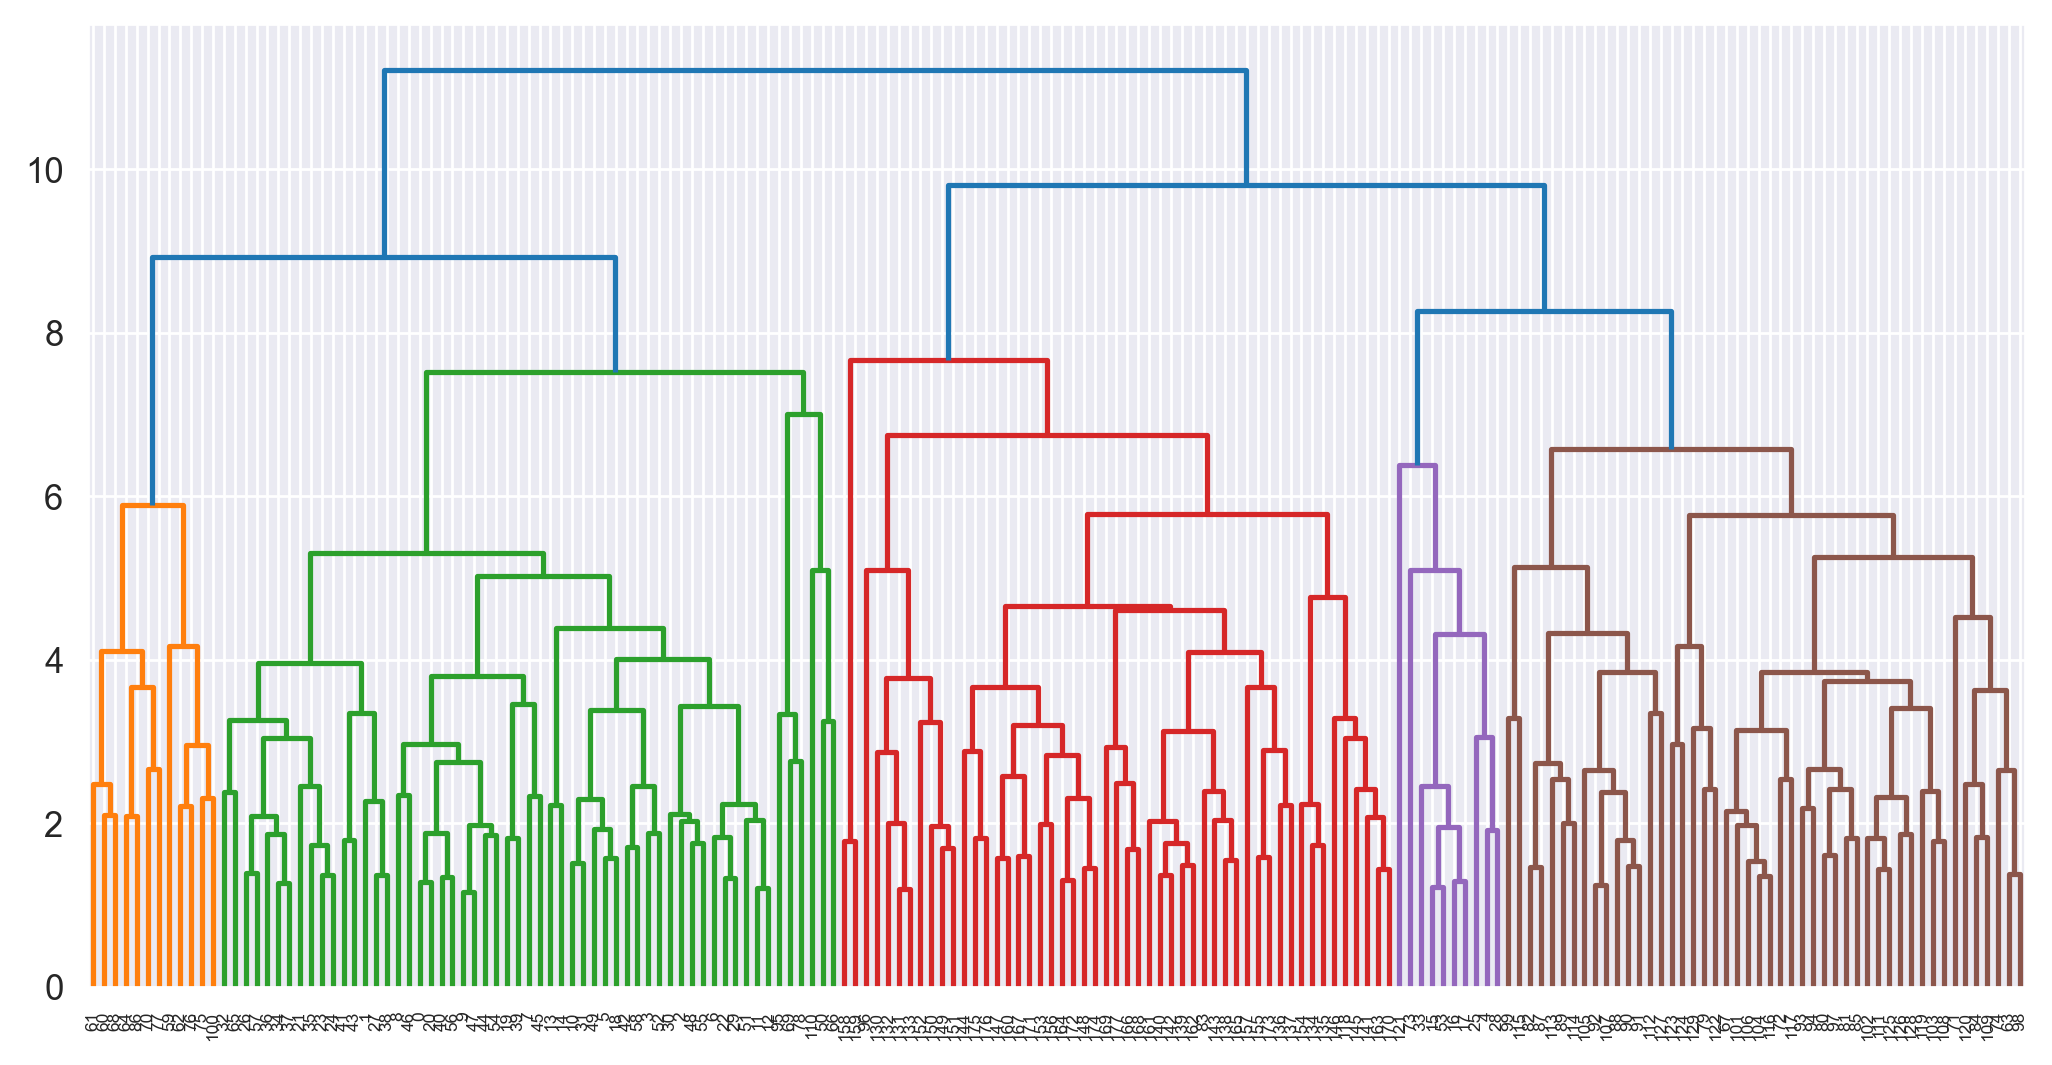

In [15]:
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [16]:
'''Even thopugh the Clusters are Distinguished, It does not provide us the information on the cut to select the optimal no of clusters.
Here we are going to make a cut to form 5 clusters(Heterogenous)'''

'Even thopugh the Clusters are Distinguished, It does not provide us the information on the cut to select the optimal no of clusters.\nHere we are going to make a cut to form 5 clusters(Heterogenous)'

In [17]:
# MODEL BUILDING

In [18]:
hc = AgglomerativeClustering(n_clusters= 5)
ypredict = hc.fit_predict(x)
ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4], dtype=int64)

In [19]:
data['Clusters_hc'] = ypredict

In [20]:
data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters_hc
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [21]:
# Analysing the Clusters

In [22]:
data.groupby('Clusters_hc').agg('mean')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clusters_hc,,,,,,,,,,,,,
0,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875
1,12.232667,1.764000,2.058667,18.396667,96.100000,2.403667,2.167667,0.275667,1.821333,3.107000,1.058667,2.937333,539.300000
2,12.856389,3.192778,2.365833,20.422222,98.361111,1.645556,0.802778,0.465278,0.966667,5.325833,0.776000,1.788889,624.083333
3,12.173214,2.126429,2.382857,22.150000,88.750000,2.112143,2.002857,0.440714,1.542143,2.668571,1.061429,2.781786,460.857143
4,13.431000,3.119500,2.497500,22.050000,102.550000,1.782000,0.929000,0.421000,1.422000,9.594000,0.622000,1.616500,626.500000


In [23]:
#Silhouette Score
silhouette_score(x,ypredict)

0.18674235566758707

In [24]:
# K-Means

In [25]:
#Elbow Graph
# To Find out the optimal no. of cluster where the wcss value will not have a drastic fall

In [26]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters= i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [27]:
wcss

[2314.0,
 1659.0079672511501,
 1277.9284888446423,
 1175.705192819712,
 1116.4375082883744,
 1049.7597147470733,
 1010.2157486755499,
 932.7651715012246,
 893.1150529827299,
 855.1689066542071]

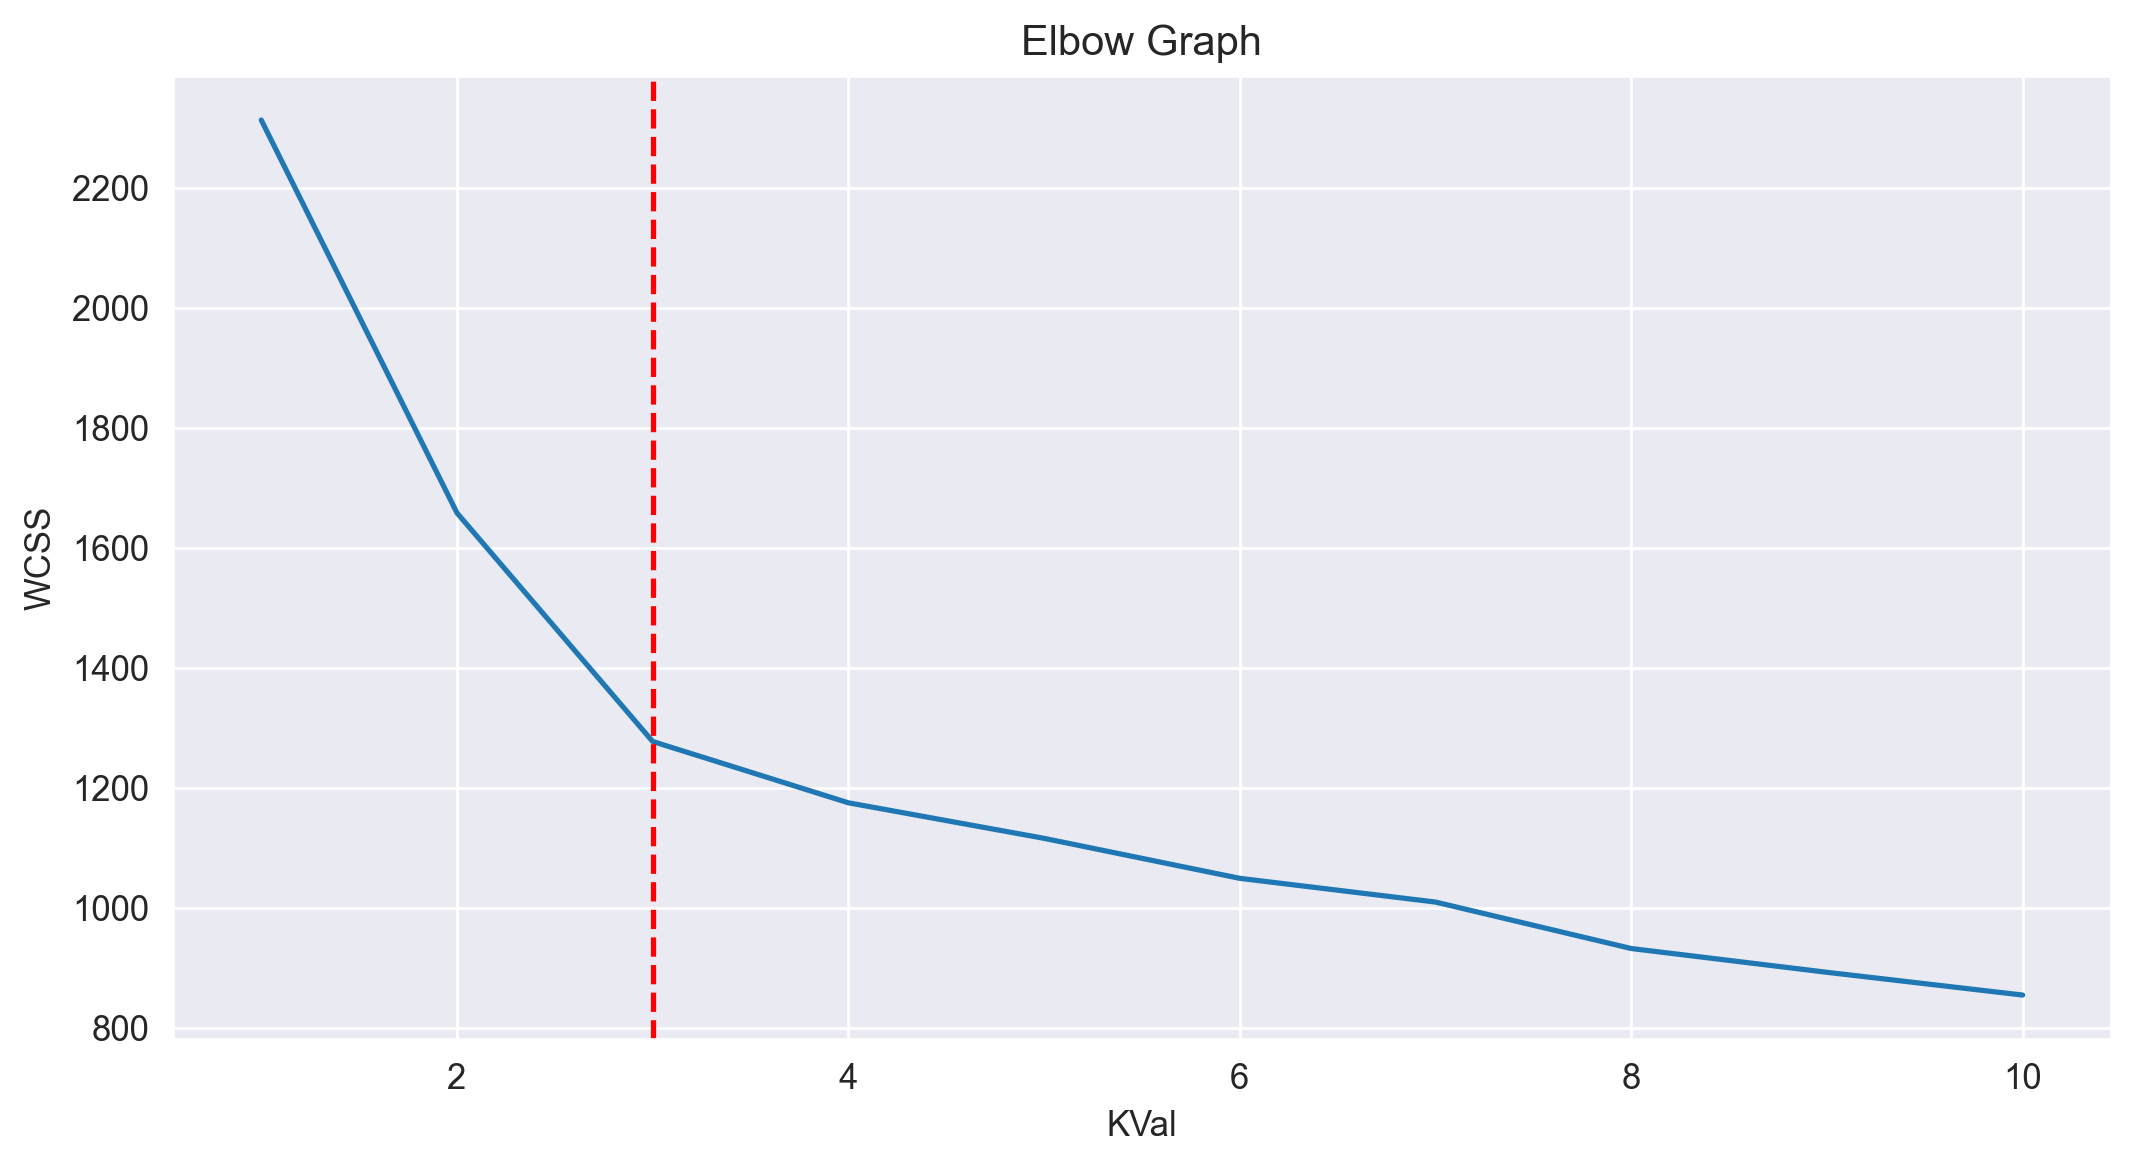

In [28]:
#Visualization
plt.plot(range(1,11),wcss)
plt.xlabel('KVal')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.axvline(x = 3, linestyle = '--', color = 'red')

In [29]:
#Model Building
km = KMeans(n_clusters= 3)
yp = km.fit_predict(x)
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [30]:
# Cluster Centers
centroid = km.cluster_centers_
centroid

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

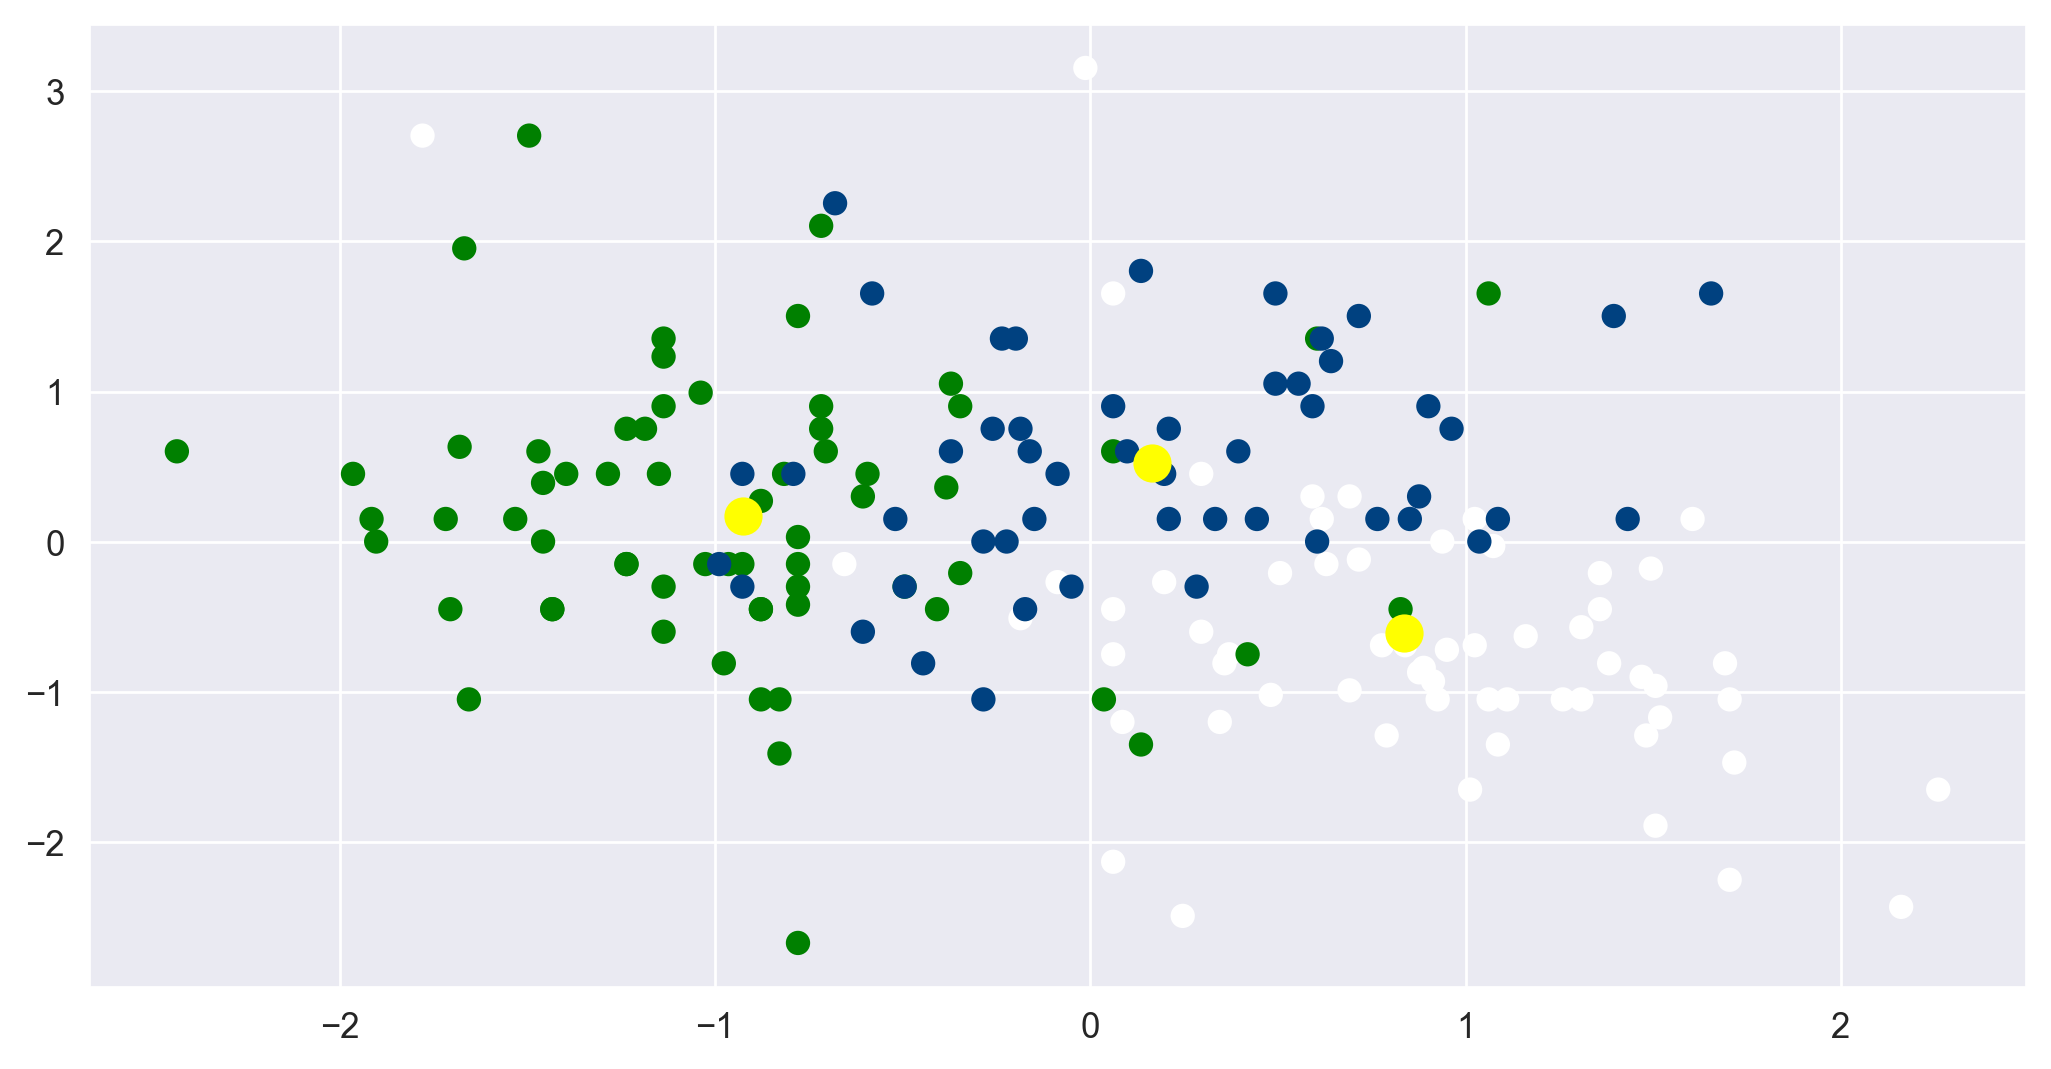

In [31]:
#Visualizing the Clusters
plt.scatter(x[:,0], x[:,3], c = yp, cmap = 'ocean')
plt.scatter(centroid[:,0], centroid[:,3], c = 'yellow', s = 100)

In [32]:
#The Clustering isn't that distinguished

In [33]:
#Silhouette Score
silhouette_score(x,yp)

0.2848589191898987

In [34]:
# Now Lets Perform the PCA & rebuild the Model

In [35]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [37]:
y = np.cumsum(pca.explained_variance_ratio_)[2]
y

0.6652996889318527

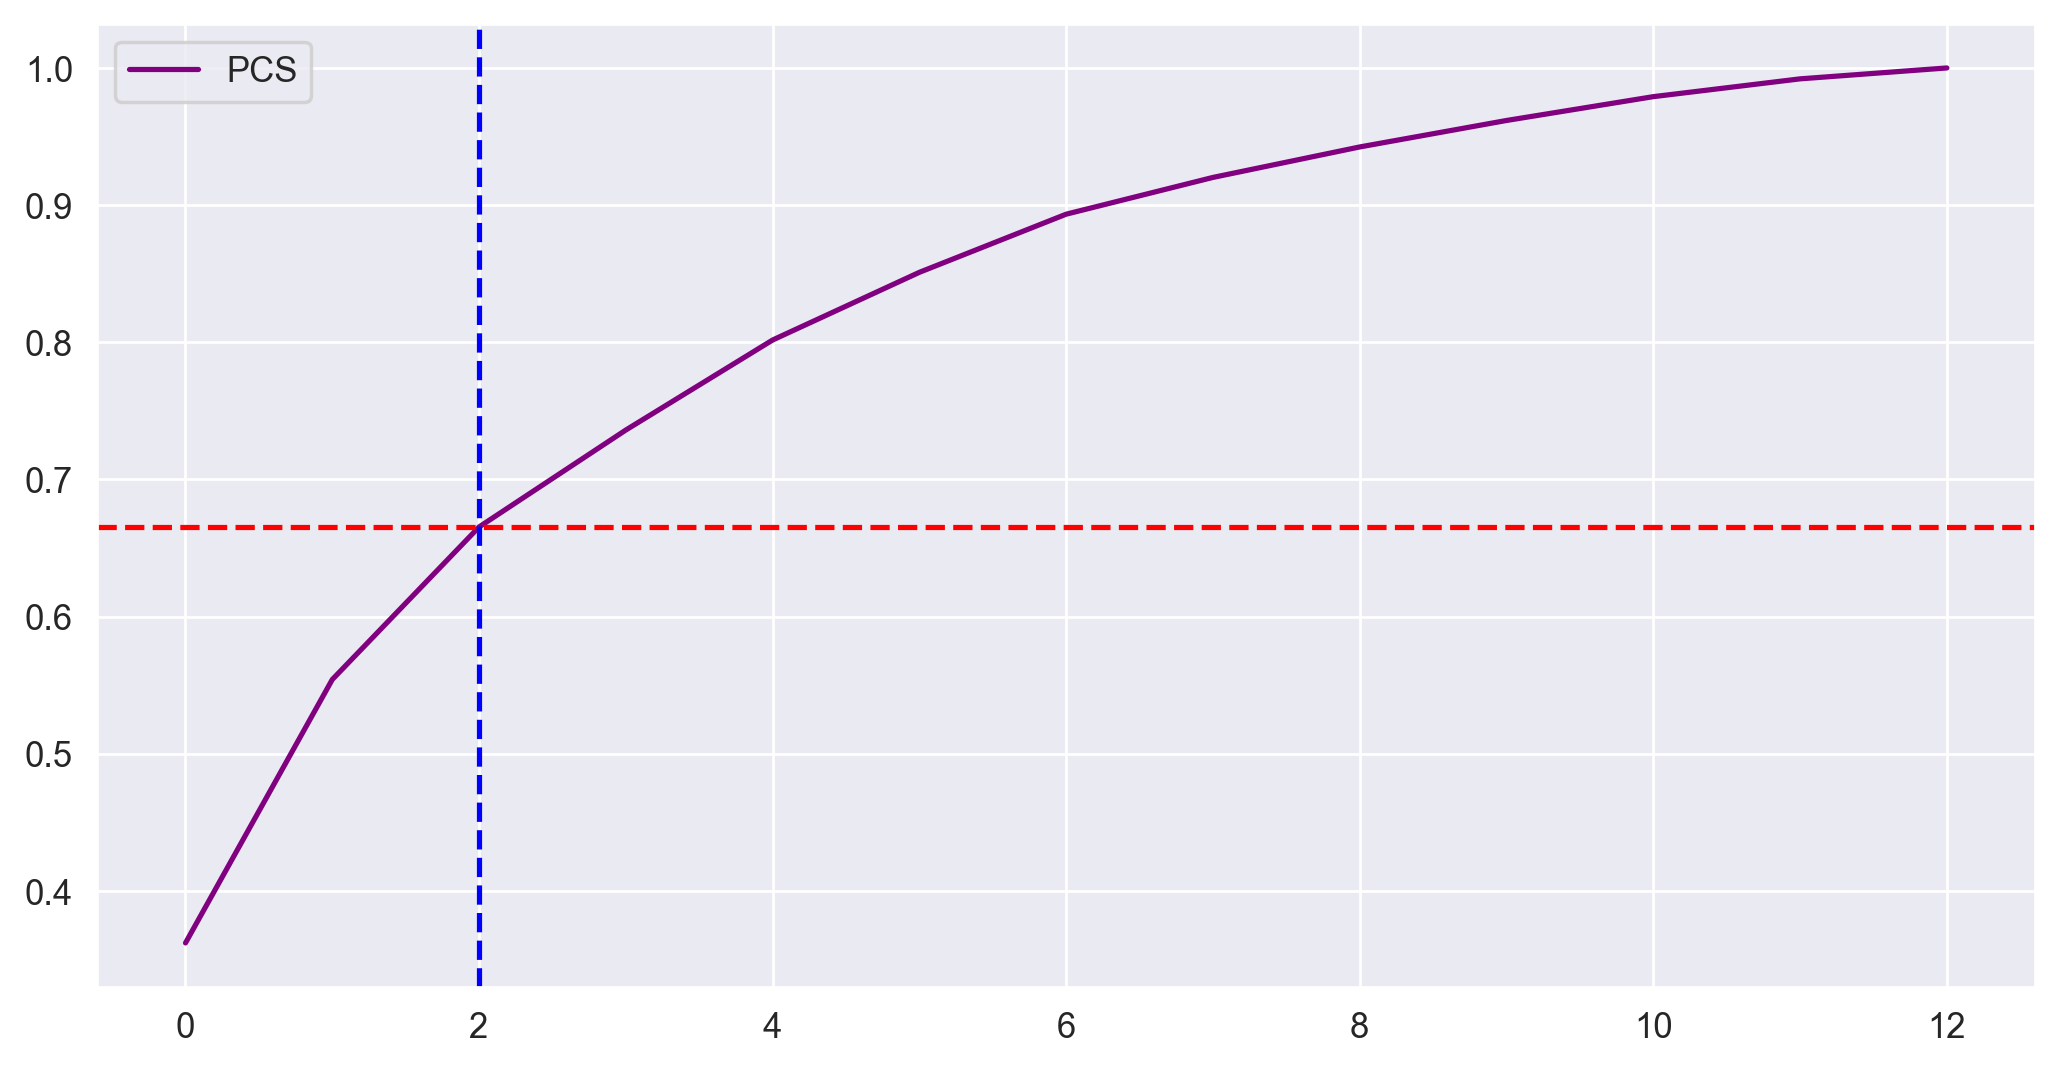

In [38]:
#Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'PCS' ,color = 'purple')
plt.axvline(x = 2, linestyle = '--', color = 'blue')
plt.axhline(y = y, linestyle = '--', color = 'red')
plt.legend()

In [39]:
#Since the Problem Statement has mentioned to consider First 3 component Scores, we will be taking PC1, PC2, PC3

In [40]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)

In [41]:
pcs_data = pd.DataFrame(pcs, columns= ['PC1', 'PC2', 'PC3'])
pcs_data

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [42]:
#MODEL BUILDING(Hierarchical Clustering)

In [43]:
#Forming Dendrogram with Complete Linkage

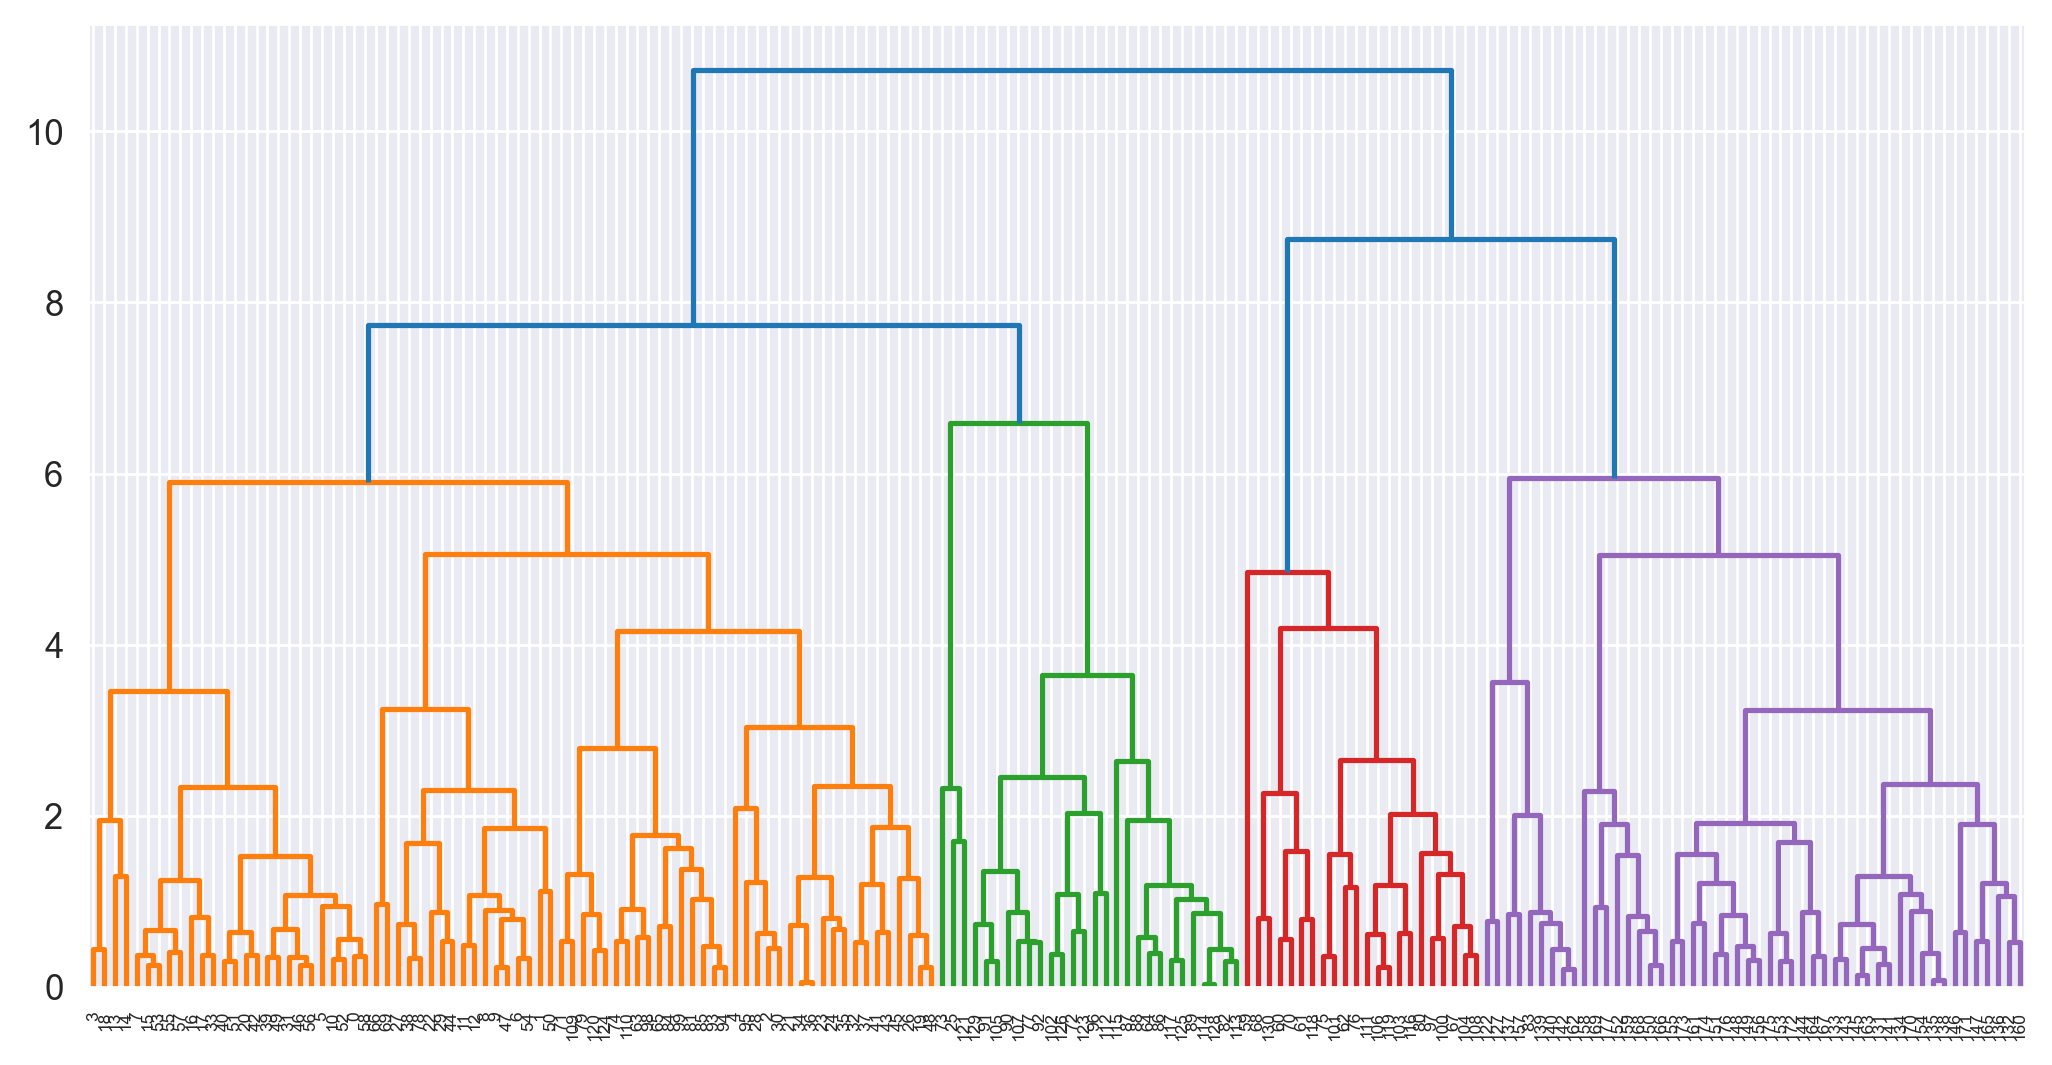

In [44]:
lk = hierarchy.linkage(pcs_data,method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [45]:
#Here we are going to make a cut to form 4 clusters(Heterogenous)

In [46]:
hc = AgglomerativeClustering(n_clusters= 4)
ypredict = hc.fit_predict(pcs_data)
ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3,
       0, 2, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 0, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [47]:
pcs_data['Clusters_hc'] = ypredict

In [48]:
pcs_data

,PC1,PC2,PC3,Clusters_hc
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [49]:
#Analysing the Clusters
pcs_data.groupby('Clusters_hc').agg('mean')

,PC1,PC2,PC3
Clusters_hc,,,
0,2.255555,-0.826594,-0.067071
1,-2.782034,-1.272012,-0.136247
2,-0.824478,1.802400,-0.840358
3,0.217686,1.655233,0.949557


In [50]:
#Silhouette Score
silhouette_score(pcs_data,ypredict)

0.4569677034462675

In [51]:
#The Accuracy is improved

In [52]:
# K-Means
#Elbow Graph
# To Find out the optimal no. of cluster where the wcss value will not have a drastic fall

In [53]:
km_pcs = pcs_data.iloc[:,0:3]
km_pcs

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [54]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters= i)
    km.fit_predict(km_pcs)
    wcss.append(km.inertia_)

In [55]:
wcss

[1539.5034801883078,
 886.1611364823502,
 513.056464591077,
 429.7504302577129,
 370.9180066061713,
 325.13049891025946,
 288.4466986492079,
 263.71133450697954,
 243.28203171019382,
 218.85139480201897]

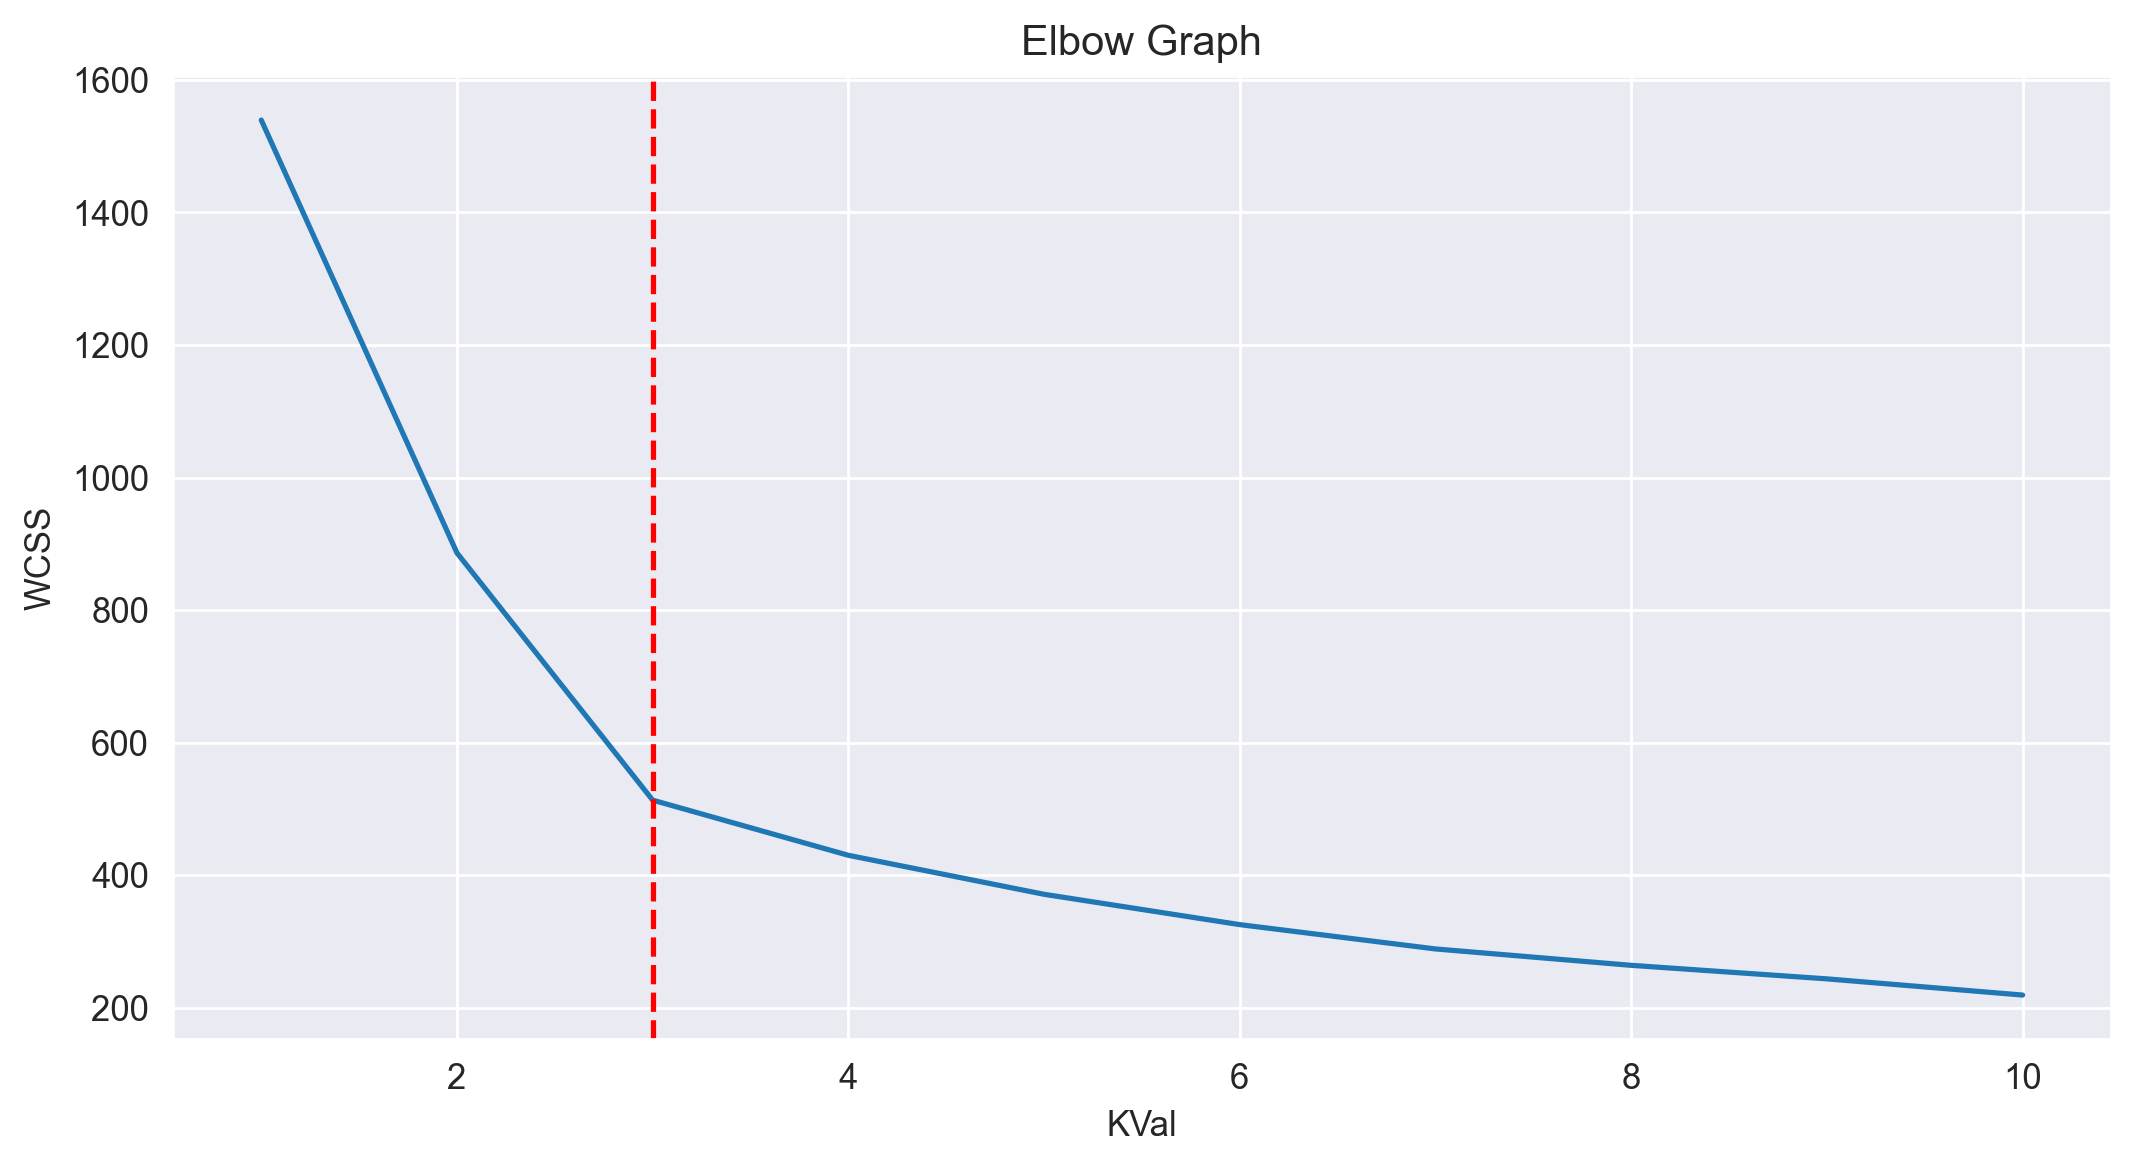

In [56]:
#Visualization
plt.plot(range(1,11),wcss)
plt.xlabel('KVal')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.axvline(x = 3, linestyle = '--', color = 'red')

In [57]:
#Model Building
km = KMeans(n_clusters= 3)
yp = km.fit_predict(km_pcs)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [58]:
# Cluster Centers
centroid = km.cluster_centers_
centroid

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

In [59]:
# Visualizing The Cluster

In [60]:
kmPCS = km_pcs.to_numpy()
kmPCS

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

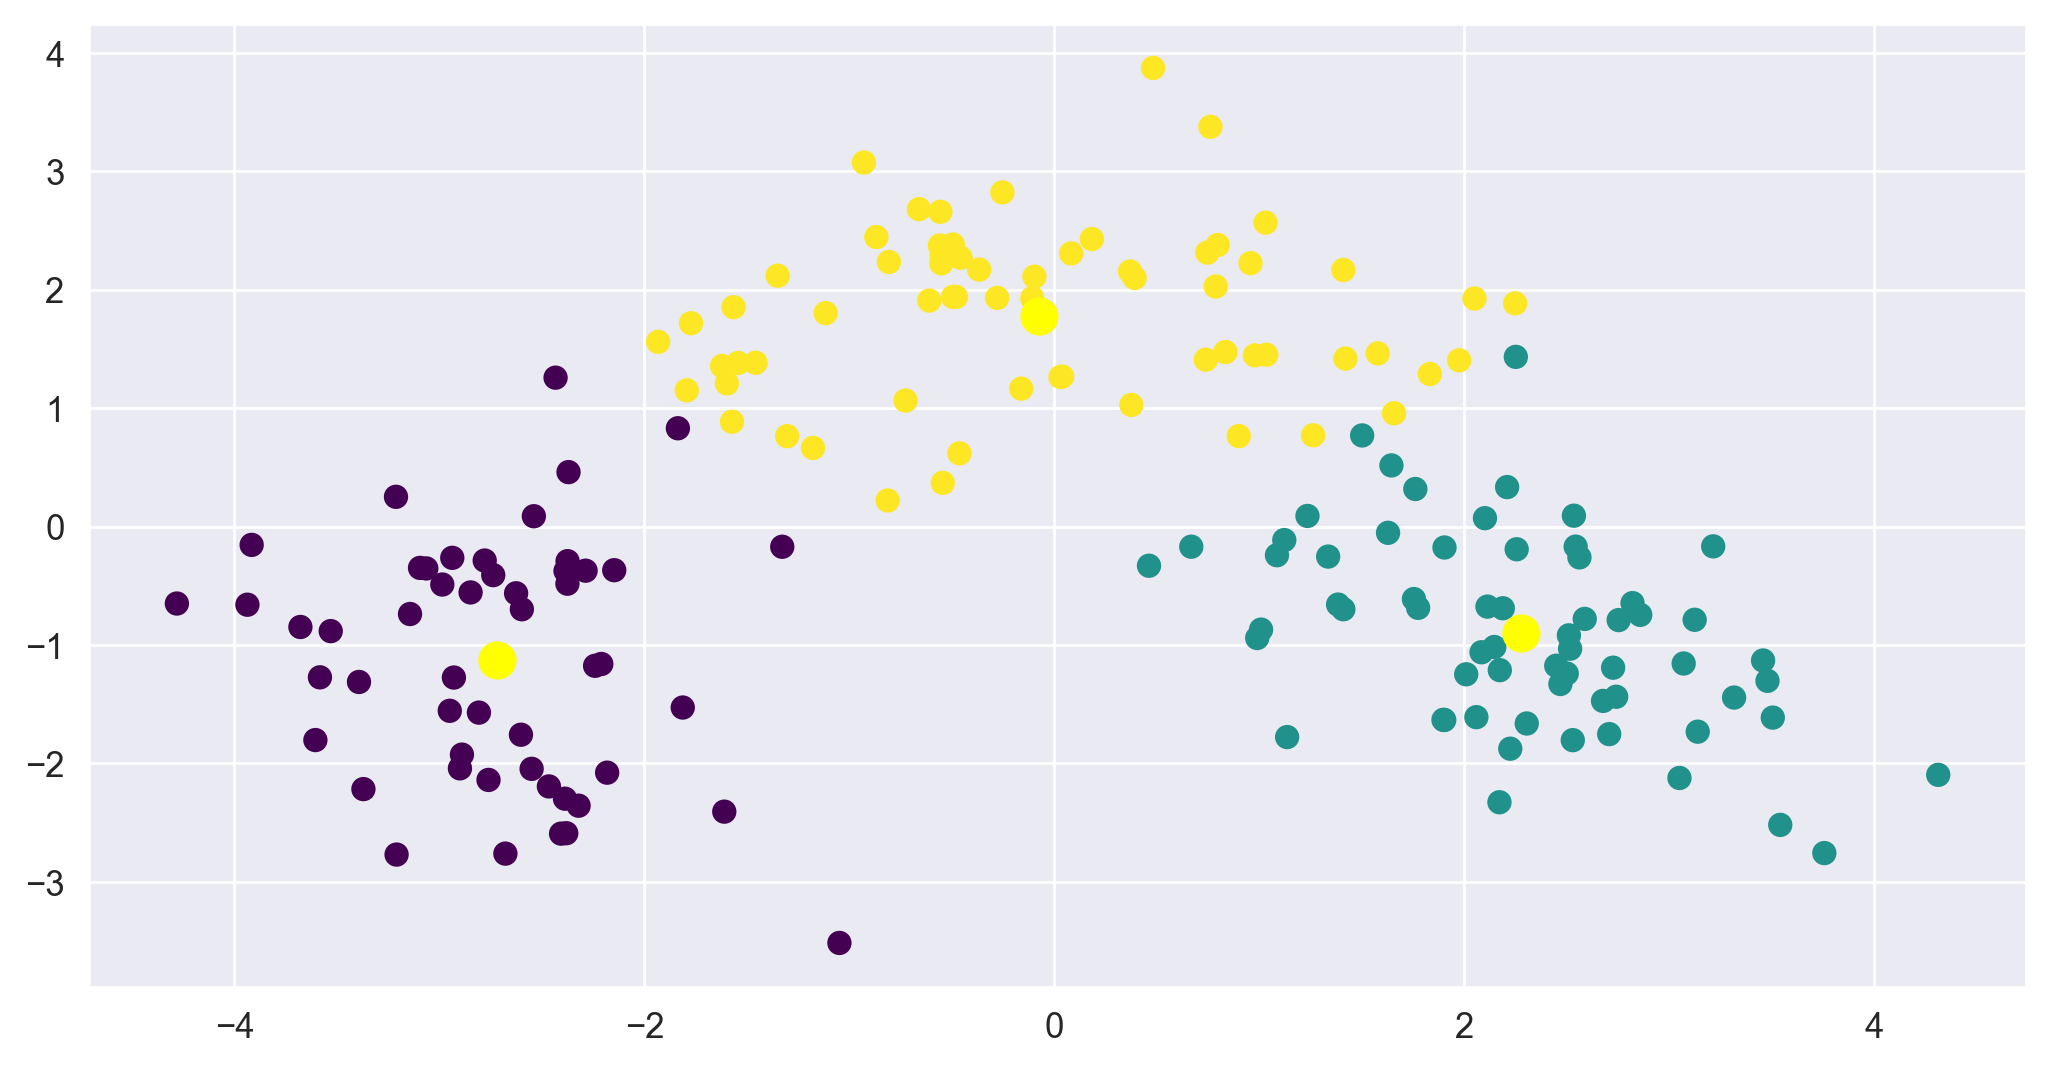

In [61]:
plt.scatter(kmPCS[:,0], kmPCS[:,1], c = yp, cmap = 'viridis')
plt.scatter(centroid[:,0], centroid[:,1], c = 'yellow', s = 100)

In [62]:
#As we can see the Clustering has been performed really well and the clusters are distinguished

In [63]:
#Silhouette Score
silhouette_score(kmPCS,yp)

0.4532351215683952

In [64]:
#The accuracy is improved